Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [86]:
import pandas as pd

bike_stations_df = pd.read_csv('../data/bike_stations.csv')
yelp_df = pd.read_csv('../data/yelp_data.csv')
foursquare_df = pd.read_csv('../data/foursquare_data.csv')

In [87]:
# Compine both Yelp and four square data
yelp_df['source'] = 'Yelp'
foursquare_df['source'] = 'Foursquare'

# Ensure common column names
yelp_df = yelp_df.rename(columns={
    'categories': 'category',
    'coordinates.latitude': 'latitude',
    'coordinates.longitude': 'longitude'
})

foursquare_df = foursquare_df.rename(columns={
    'categories': 'category',
    'lat': 'latitude',
    'lng': 'longitude'
})

# Combine both into poi_df
poi_df = pd.concat([yelp_df, foursquare_df], ignore_index=True)

#  Combile POI and and bike station data frame
poi_df

,cluster,name,category,rating,review_count,latitude,longitude,address,source,lon
0,0.0,Haidilao Hot Pot,Chinese,4.7,89.0,43.654633,-79.379839,"['237 Yonge Street', 'Toronto, ON M5B 1N8', 'C...",Yelp,NaN
1,0.0,The Rabbit Hole,Gastropubs,4.2,57.0,43.649950,-79.379760,"['21 Adelaide Street W', 'Toronto, ON M5H 1L6'...",Yelp,NaN
2,0.0,Gyukatsu Kyoto Katsugyu,Japanese,4.0,186.0,43.656870,-79.376160,"['134 Dundas Street E', 'Toronto, ON M5B 1E2',...",Yelp,NaN
3,0.0,The Senator,Breakfast & Brunch,3.9,524.0,43.655740,-79.378960,"['249 Victoria Street', 'Toronto, ON M5B 1T8',...",Yelp,NaN
4,0.0,Adobar,Filipino,5.0,5.0,43.657322,-79.373885,"['200 Dundas Street E', 'Toronto, ON M5A 1Z4',...",Yelp,NaN
...,...,...,...,...,...,...,...,...,...,...
574,9.0,San Francesco Foods,Sandwich Spot,NaN,NaN,43.653956,NaN,NaN,Foursquare,-79.413554
575,9.0,Monarch Tavern,Dive Bar,NaN,NaN,43.654105,NaN,NaN,Foursquare,-79.413606
576,9.0,SkyDome In Trinity Bellwoods Park,Baseball Field,NaN,NaN,43.649732,NaN,NaN,Foursquare,-79.414319
577,9.0,Provenance Regional Cuisine,Grocery Store,NaN,NaN,43.651975,NaN,NaN,Foursquare,-79.408376


In [90]:
from sklearn.cluster import KMeans

# use the ckuster used for POI
kmeans = KMeans(n_clusters=10, random_state=0)
# poi_coords = poi_df[['latitude', 'longitude']]
poi_coords = poi_df[['latitude', 'longitude']].dropna()
kmeans.fit(poi_coords)
bike_stations_df
# Assign cluster to bike stations
bike_stations_df['cluster'] = kmeans.predict(bike_stations_df[['latitude', 'longitude']])

# change the coumn name for better understanding
bike_stations_df = bike_stations_df.rename(columns={
    'name': 'Bikestation_name',
    'latitude' : 'latitude_station',
    'longitude' : 'longitude_station'
    
})

# Merge bike station and POI dataframe
combined_df = pd.merge(poi_df, bike_stations_df, on='cluster', how='left')
combined_df 

,cluster,name,category,rating,review_count,latitude,longitude,address,source,lon,Bikestation_name,latitude_station,longitude_station,free_bikes,empty_slots
0,0.0,Haidilao Hot Pot,Chinese,4.7,89.0,43.654633,-79.379839,"['237 Yonge Street', 'Toronto, ON M5B 1N8', 'C...",Yelp,NaN,Fenwood Ht / Kingston Rd,43.726902,-79.229204,9,4
1,0.0,Haidilao Hot Pot,Chinese,4.7,89.0,43.654633,-79.379839,"['237 Yonge Street', 'Toronto, ON M5B 1N8', 'C...",Yelp,NaN,McCowan Rd / Trudelle St,43.740339,-79.239353,5,13
2,0.0,Haidilao Hot Pot,Chinese,4.7,89.0,43.654633,-79.379839,"['237 Yonge Street', 'Toronto, ON M5B 1N8', 'C...",Yelp,NaN,Bay Mills Blvd / Birchmount Ave,43.783430,-79.299559,6,8
3,0.0,Haidilao Hot Pot,Chinese,4.7,89.0,43.654633,-79.379839,"['237 Yonge Street', 'Toronto, ON M5B 1N8', 'C...",Yelp,NaN,Pharmacy Ave / Eglinton Ave E,43.725345,-79.297687,4,11
4,0.0,Haidilao Hot Pot,Chinese,4.7,89.0,43.654633,-79.379839,"['237 Yonge Street', 'Toronto, ON M5B 1N8', 'C...",Yelp,NaN,Kennedy Rd / Bertrand Ave,43.737462,-79.269959,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60319,9.0,Ciccio's Pizza & Pasta,Pizzeria,NaN,NaN,43.651982,NaN,NaN,Foursquare,-79.408283,The Pond Rd / Sentinel Rd,43.769626,-79.502594,2,24
60320,9.0,Ciccio's Pizza & Pasta,Pizzeria,NaN,NaN,43.651982,NaN,NaN,Foursquare,-79.408283,Jane St / Yewtree Blvd,43.755317,-79.517047,13,1
60321,9.0,Ciccio's Pizza & Pasta,Pizzeria,NaN,NaN,43.651982,NaN,NaN,Foursquare,-79.408283,Jane St / Spenvalley Dr,43.740937,-79.513389,0,15
60322,9.0,Ciccio's Pizza & Pasta,Pizzeria,NaN,NaN,43.651982,NaN,NaN,Foursquare,-79.408283,The Pond Rd / Ian Macdonald Blvd,43.770867,-79.498130,6,9


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

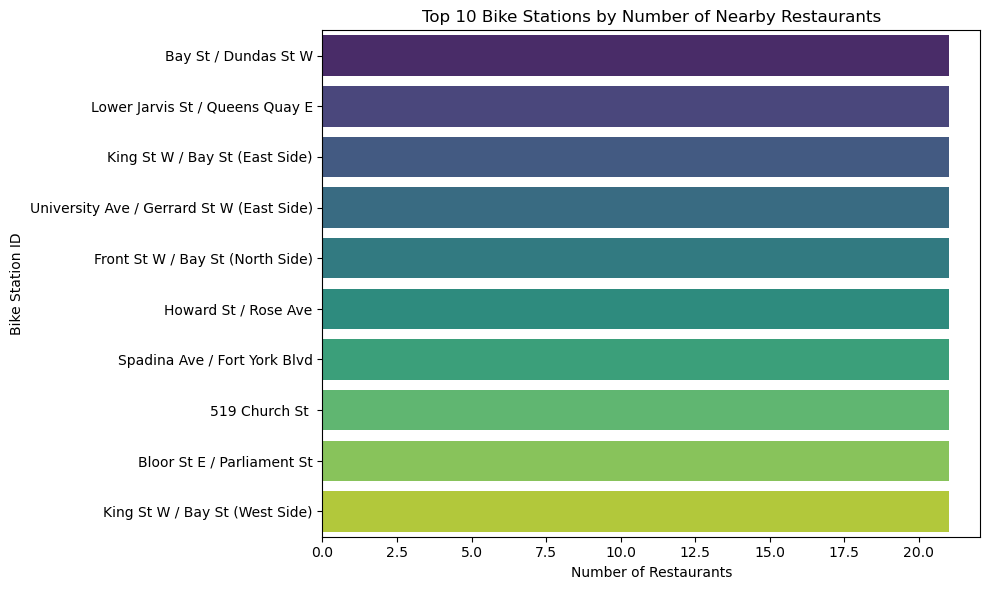

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot with hue and no legend
plt.figure(figsize=(10, 6))

# Filter combined_df to only include restaurants
restaurants_df = combined_df[combined_df['category'].str.contains('Restaurant', case=False, na=False)]

# Count number of restaurants near each station
station_restaurant_counts = restaurants_df['Bikestation_name'].value_counts().head(10)
sns.barplot(x=station_restaurant_counts.values, y=station_restaurant_counts.index, hue=station_restaurant_counts.index, palette='viridis')

plt.title('Top 10 Bike Stations by Number of Nearby Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Bike Station ID')
plt.tight_layout()
plt.show()

Above chart shows the number of restaurent in each bike station. It seems like it has equal number of number of restaurants.

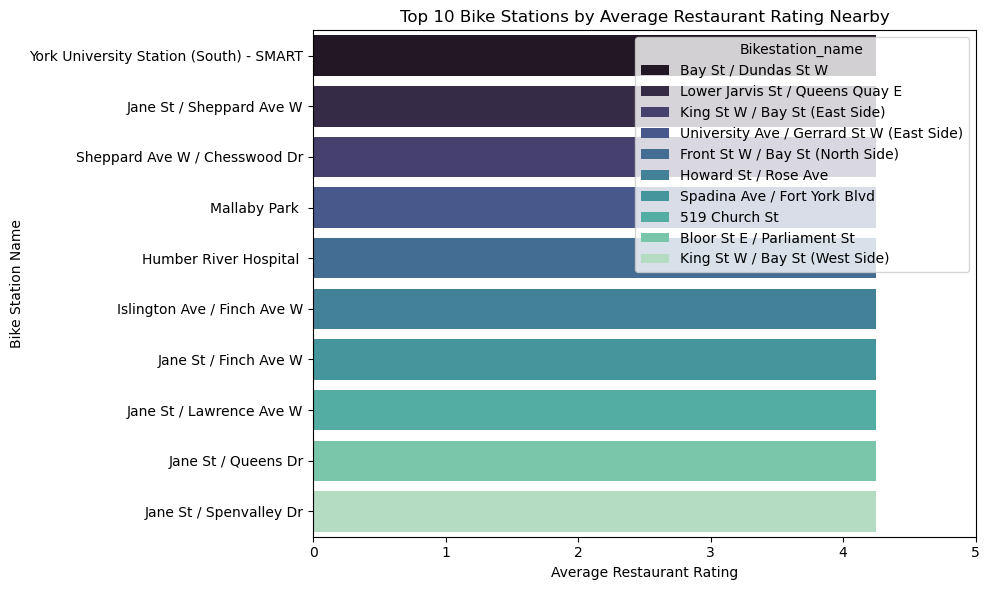

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only restaurants
restaurants_df = combined_df[combined_df['category'].str.contains('Restaurant', case=False, na=False)]

# Group by bike station and calculate average rating
station_avg_rating = restaurants_df.groupby('Bikestation_name')['rating'].mean().sort_values(ascending=False).head(10)

# Plot the result
plt.figure(figsize=(10, 6))
sns.barplot(
    x=station_avg_rating.values,
    y=station_avg_rating.index,
    hue=station_restaurant_counts.index,
    palette='mako'
)
plt.title('Top 10 Bike Stations by Average Restaurant Rating Nearby')
plt.xlabel('Average Restaurant Rating')
plt.ylabel('Bike Station Name')
plt.xlim(0, 5)
plt.tight_layout()
plt.show()


Above chart shows that which station has the average high ratings.

In [55]:
print("Columns in poi_df:", poi_df.columns.tolist())
print("Columns in bike_stations_df:", bike_stations_df.columns.tolist())

Columns in poi_df: ['cluster', 'name', 'category', 'rating', 'review_count', 'latitude', 'longitude', 'address', 'source', 'lon']
Columns in bike_stations_df: ['Bikestation_name', 'latitude', 'longitude', 'free_bikes', 'empty_slots', 'cluster']


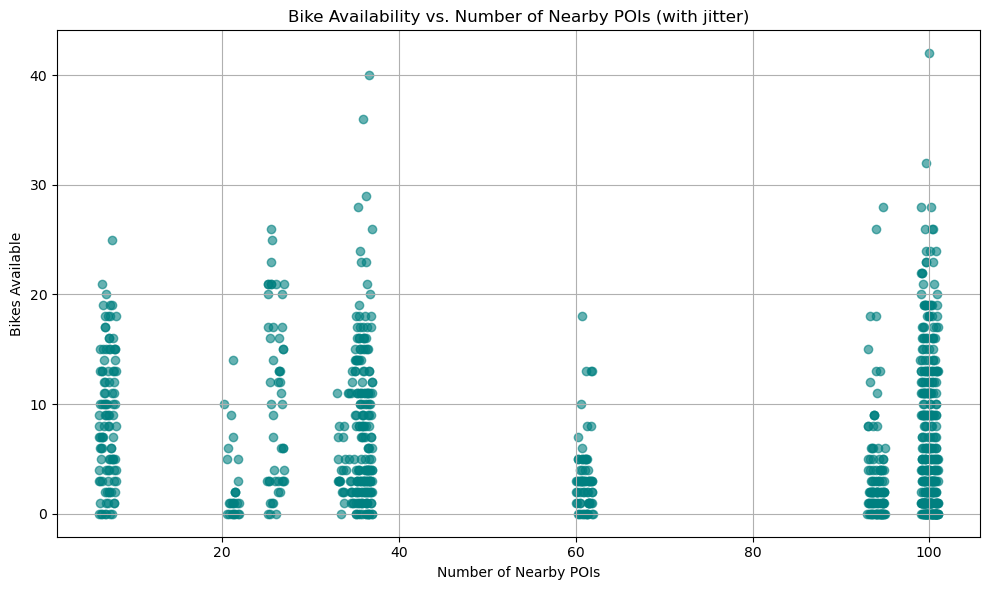

In [93]:
import numpy as np

# Add jitter to num_pois for clearer distribution
jittered_pois = station_merged['num_pois'] + np.random.uniform(-1, 1, size=len(station_merged))

plt.figure(figsize=(10, 6))
plt.scatter(jittered_pois, station_merged['bikes_available'], alpha=0.6, color='teal')
plt.title('Bike Availability vs. Number of Nearby POIs (with jitter)')
plt.xlabel('Number of Nearby POIs')
plt.ylabel('Bikes Available')
plt.grid(True)
plt.tight_layout()
plt.show()

Interpretation:
X-axis (Number of Nearby POIs): Shows how many Points of Interest (POIs) — like restaurants, shops, etc. — are near a bike station.

Y-axis (Bikes Available): Represents the number of bikes currently available at the station .

Insight:
Stations with ~100 nearby POIs show a wide range of bike availability, including some of the highest values (over 40 bikes).
However, even among those with many POIs, bike availability varies significantly, which suggests that POI count alone doesn’t fully explain bike availability.
There seems to be a dense concentration of stations with low POIs and low bike availability, but the variability increases as POIs increase.

Conclusion:
While some stations with the most nearby POIs have high bike availability, the relationship isn't strictly linear. Other factors may influence bike availability, such as time of day, day of the week, or station capacity.



# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [112]:
import sqlite3
from sqlite3 import Error
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [60]:
connection = create_connection("../data/bikestation.sqlite")


Connection to SQLite DB successful


In [94]:
connection.execute('''
    CREATE TABLE IF NOT EXISTS stations (
        station_id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT,
        latitude REAL,
        longitude REAL,
        bikes_available INTEGER
    )
''')

# Create POIs table
connection.execute('''
    CREATE TABLE IF NOT EXISTS pois (
        poi_id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT,
        category TEXT,
        rating REAL
    )
''')

# Create station_pois table (relationship)
connection.execute('''
    CREATE TABLE IF NOT EXISTS station_pois (
        station_id INTEGER,
        poi_id INTEGER,
        distance_m REAL,
        FOREIGN KEY(station_id) REFERENCES stations(station_id),
        FOREIGN KEY(poi_id) REFERENCES pois(poi_id)
    )
''')



Look at the data before and after the join to validate your data.

In [113]:
inserted_records = []
combined_df = combined_df.dropna(subset=[
    'latitude', 'longitude', 'latitude_station', 'longitude_station'
])
for _, row in combined_df.iterrows():
    cursor = connection.cursor()

    # Insert station
    cursor.execute('''
        INSERT OR IGNORE INTO stations (name, latitude, longitude, bikes_available)
        VALUES (?, ?, ?, ?)
    ''', (row['Bikestation_name'], row['latitude_station'], row['longitude_station'], row['free_bikes']))
    station_id = cursor.lastrowid
    if station_id == 0:
        cursor.execute('''
            SELECT station_id FROM stations WHERE name = ? AND latitude = ? AND longitude = ?
        ''', (row['Bikestation_name'], row['latitude_station'], row['longitude_station']))
        station_id = cursor.fetchone()[0]

    # Insert POI
    cursor.execute('''
        INSERT OR IGNORE INTO pois (name, category, rating)
        VALUES (?, ?, ?)
    ''', (row['name'], row['category'], row['rating']))
    poi_id = cursor.lastrowid
    if poi_id == 0:
        cursor.execute('''
            SELECT poi_id FROM pois WHERE name = ? AND category = ? AND rating = ?
        ''', (row['name'], row['category'], row['rating']))
        poi_id = cursor.fetchone()[0]

    # Calculate distance
    poi_coords = (row['latitude'], row['longitude'])
    station_coords = (row['latitude_station'], row['longitude_station'])
    distance_m = geodesic(poi_coords, station_coords).meters

    # Insert into junction table
    cursor.execute('''
        INSERT OR IGNORE INTO station_pois (station_id, poi_id, distance_m)
        VALUES (?, ?, ?)
    ''', (station_id, poi_id, distance_m))

    # Commit & record
    connection.commit()
    cursor.close()

    # Append record to list
    inserted_records.append({
        'station_id': station_id,
        'station_name': row['Bikestation_name'],
        'poi_id': poi_id,
        'poi_name': row['name'],
        'distance_m': distance_m
    })

# Convert to DataFrame if needed
result_df = pd.DataFrame(inserted_records)
print(result_df.head())


   station_id                     station_name  poi_id          poi_name  \
0      410447         Fenwood Ht / Kingston Rd  376244  Haidilao Hot Pot   
1      410448         McCowan Rd / Trudelle St  376245  Haidilao Hot Pot   
2      410449  Bay Mills Blvd / Birchmount Ave  376246  Haidilao Hot Pot   
3      410450   Pharmacy Ave / Eglinton Ave E   376247  Haidilao Hot Pot   
4      410451        Kennedy Rd / Bertrand Ave  376248  Haidilao Hot Pot   

     distance_m  
0  14558.857339  
1  14796.342990  
2  15704.581283  
3  10275.832880  
4  12773.176587  


In [111]:
print("Shape:", combined_df.shape)

Shape: (34203, 15)


In [109]:
# Check stations table
stations_df = pd.read_sql_query("SELECT * FROM stations", connection)
print("\n Stations Table:")
print(stations_df.head())
print("Total Stations:", stations_df.shape[0])

# Check POIs table
pois_df = pd.read_sql_query("SELECT * FROM pois", connection)
print("\n POIs Table:")
print(pois_df.head())
print("Total POIs:", pois_df.shape[0])

# Check station_pois table (the join table)
station_pois_df = pd.read_sql_query("SELECT * FROM station_pois", connection)
print("\n Station_POIs Table:")
print(station_pois_df.head())
print("Total Station-POI Links:", station_pois_df.shape[0])


📌 Stations Table:
   station_id                             name   latitude  longitude  \
0           1         Fenwood Ht / Kingston Rd  43.726902 -79.229204   
1           2         McCowan Rd / Trudelle St  43.740339 -79.239353   
2           3  Bay Mills Blvd / Birchmount Ave  43.783430 -79.299559   
3           4   Pharmacy Ave / Eglinton Ave E   43.725345 -79.297687   
4           5        Kennedy Rd / Bertrand Ave  43.737462 -79.269959   

   bikes_available  
0                9  
1                5  
2                6  
3                4  
4                0  
Total Stations: 410446

📍 POIs Table:
   poi_id              name category  rating
0       1  Haidilao Hot Pot  Chinese     4.7
1       2  Haidilao Hot Pot  Chinese     4.7
2       3  Haidilao Hot Pot  Chinese     4.7
3       4  Haidilao Hot Pot  Chinese     4.7
4       5  Haidilao Hot Pot  Chinese     4.7
Total POIs: 376243

🔗 Station_POIs Table:
   station_id  poi_id    distance_m
0           1       1  14558.857339


In [114]:
# To make sure the station_pois table is correctly linking valid station_id and poi_id:
joined_df = pd.read_sql_query('''
    SELECT sp.station_id, s.name AS station_name,
           sp.poi_id, p.name AS poi_name, sp.distance_m
    FROM station_pois sp
    JOIN stations s ON sp.station_id = s.station_id
    JOIN pois p ON sp.poi_id = p.poi_id
''', connection)

print("\n Joined View of Station_POIs:")
print(joined_df.head())
print("Total Valid Joins:", joined_df.shape[0])


🔍 Joined View of Station_POIs:
   station_id                     station_name  poi_id          poi_name  \
0           1         Fenwood Ht / Kingston Rd       1  Haidilao Hot Pot   
1           2         McCowan Rd / Trudelle St       1  Haidilao Hot Pot   
2           3  Bay Mills Blvd / Birchmount Ave       1  Haidilao Hot Pot   
3           4   Pharmacy Ave / Eglinton Ave E        1  Haidilao Hot Pot   
4           5        Kennedy Rd / Bertrand Ave       1  Haidilao Hot Pot   

     distance_m  
0  14558.857339  
1  14796.342990  
2  15704.581283  
3  10275.832880  
4  12773.176587  
Total Valid Joins: 444639
